In [1]:
# !pip install library_name

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# df = pd.read_excel("Dhaka Rent.xlsx")
df = pd.read_csv("Dhaka Rent.csv")

In [4]:
df.head(3)

,area;rent
0,2000;31500
1,2100;35000
2,2500;41050


In [5]:
df.shape

(60, 1)

In [6]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [7]:
df.shape

(60, 2)

In [8]:
x = df['area']
y = df['rent']

In [9]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [10]:
mean_x

2289.0

In [11]:
mean_y

37269.166666666664

In [12]:
df.area.mean()

2289.0

In [13]:
dev_x = x - mean_x
dev_y = y - mean_y

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
print(m)

21.292661473611954


In [15]:
# y = mx + c
c = mean_y - (m*mean_x)
print(c)

-11469.7354464311


In [16]:
pred_2000 = m*2000 + c
pred_2000

31115.58750079281

# Sklearn

[Color in Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html)

Text(0.5, 1.0, 'House Rent in Dhaka')

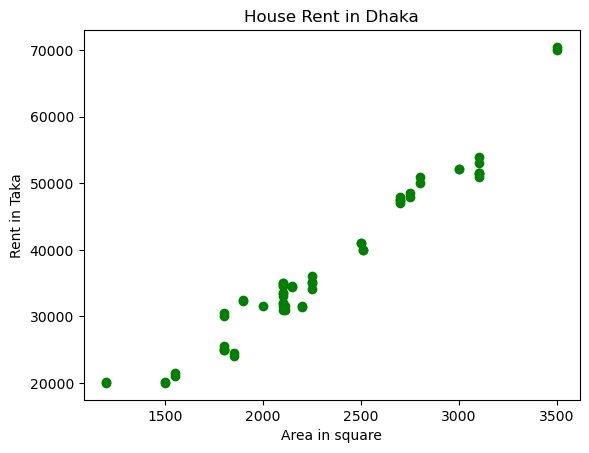

In [17]:
plt.scatter(x,y, color='green')
plt.xlabel('Area in square')
plt.ylabel('Rent in Taka')
plt.title('House Rent in Dhaka')

In [18]:
df.corr() #correlatin between two variables

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [19]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


# Dataset Split

In [20]:
from sklearn.model_selection import train_test_split as tts

In [21]:
train, test = tts(df, test_size=.30)

In [22]:
train.head()

,area,rent
15,3100,51500
11,2100,32000
40,2150,34400
9,2100,31000
36,1500,20200


In [23]:
test.head()

,area,rent
1,2100,35000
19,2700,47000
57,1800,25100
6,1500,20000
55,3100,54000


In [24]:
df.head(6)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500


In [25]:
xtrain, xtest, ytrain, ytest = tts(df[['area']], df[['rent']], train_size=.70, random_state=42)

In [26]:
xtrain.head(3)

,area
40,2150
4,3000
43,2510


In [27]:
ytrain.head(3)

,rent
40,34400
4,52100
43,40000


[Least Squared LR](https://scikit-learn.org/1.5/modules/linear_model.html#ordinary-least-squares)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
x.shape

(60,)

In [30]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [31]:
reg.fit(xtrain, ytrain) # x always 2D

LinearRegression()

In [32]:
reg.coef_

array([[20.68636687]])

In [33]:
reg.intercept_

array([-10252.90474034])

In [34]:
#OLD C, m
print(c,m)

-11469.7354464311 21.292661473611954


In [35]:
reg.predict([[2000]])

array([[31119.82900279]])

In [36]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [37]:
df['predicted'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874


In [38]:
df['residuals'] = df['rent'] - df['predicted']
df.head()

,area,rent,predicted,residuals
0,2000,31500,31119.829003,380.170997
1,2100,35000,33188.465690,1811.534310
2,2500,41050,41463.012439,-413.012439
3,2250,36100,36291.420721,-191.420721
4,3000,52100,51806.195874,293.804126


# Test

In [39]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [40]:
reg.predict(xtest)

array([[31119.82900279],
       [29051.19231563],
       [20776.64556701],
       [53874.83256151],
       [41669.87610729],
       [47668.92250004],
       [36291.42072068],
       [26982.55562848],
       [33188.46568994],
       [26982.55562848],
       [26982.55562848],
       [33395.32935866],
       [33188.46568994],
       [36291.42072068],
       [62149.37931013],
       [21810.96391059],
       [45600.28581288],
       [20776.64556701]])

In [41]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


# Coefficient of determination

In [42]:
reg.score(xtest, ytest) #testing score

0.9515542918540623

In [43]:
reg.score(xtrain, ytrain) #training score

0.9471905709752625

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(ytest, reg.predict(xtest))   #testing score

0.9515542918540623

In [46]:
r2_score(ytrain, reg.predict(xtrain))   #training score

0.9471905709752625

# MSE, MAE, RMSE

In [47]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [48]:
mse = mean_squared_error(df[['predicted']], df[['rent']])
mse

6912277.636912411

In [49]:
mae = mean_absolute_error(df.predicted , df.rent)
mae

2016.0444418768272

# Best fit line

Text(0.5, 1.0, 'House Rent in Dhaka')

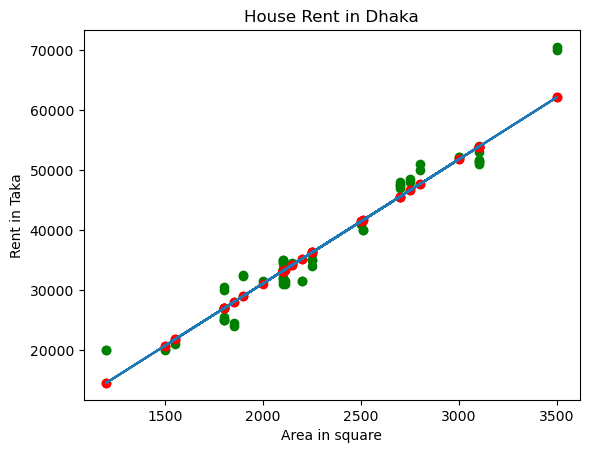

In [50]:
plt.scatter(x,y, color='green')

plt.plot(x, df.predicted)
plt.scatter(x, df.predicted, color='red')

plt.xlabel('Area in square')
plt.ylabel('Rent in Taka')
plt.title('House Rent in Dhaka')

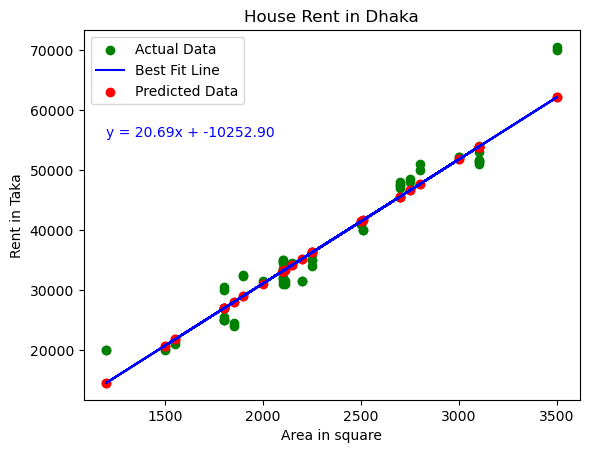

In [51]:
m = float(reg.coef_[0])  
c = float(reg.intercept_)

# equation of the line
equation = f"y = {m:.2f}x + {c:.2f}"

# Plot the data
plt.scatter(df['area'], df['rent'], color='green', label="Actual Data")  # Original data points
plt.plot(df['area'], reg.predict(df[['area']]), color='blue', label="Best Fit Line")  # Regression line
plt.scatter(df['area'], reg.predict(df[['area']]), color='red', label="Predicted Data")  # Predicted points

plt.xlabel('Area in square')
plt.ylabel('Rent in Taka')
plt.title('House Rent in Dhaka')
plt.text(min(df['area']), max(df['rent']) - 15000, equation, fontsize=10, color='blue')  # Display equation on plot

# Adding a legend
plt.legend()

# Showing the plot
plt.show()
